## Load all required libraries and set seed

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(
    45
)


## Load Data

We load our training and testing data.

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
X = train_data.iloc[:,1:-1]

In [4]:
Y = train_data.iloc[:,-1]
Y = Y - 1
Y.value_counts()

0    401
1     42
Name: y_train, dtype: int64

## Define the model

It has 4 layers:

- Input layer with 500 inputs (number of input gene values)
- Dense layer with 200 neurons
- Hidden Dense layer with 100 neurons
- Output layer with 2 neurons, predicts outcome

In [5]:
model = tf.keras.Sequential([

  tf.keras.layers.Dense(20), # add 20 dense neurons

  tf.keras.layers.Dense(10), # add another layer with 10 neurons

  tf.keras.layers.Dense(2)

])

In [6]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                optimizer=tf.keras.optimizers.Adam(), 

                metrics=['accuracy',])

In [7]:
fit = model.fit(X, Y, epochs=10, batch_size=2)

Epoch 1/10
222/222 [==============================] - 3s 3ms/step - loss: 1.5031 - accuracy: 0.3747
Epoch 2/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 3/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 4/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 5/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 6/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 7/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 8/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 9/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792
Epoch 10/10
222/222 [==============================] - 1s 3ms/step - loss: 1.4624 - accuracy: 0.3792

## A SUMMARY OF THE MODEL

Down below we get an overvie of the architecture of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                10020     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 10,252
Trainable params: 10,252
Non-trainable params: 0
_________________________________________________________________


### Printing model performance through time

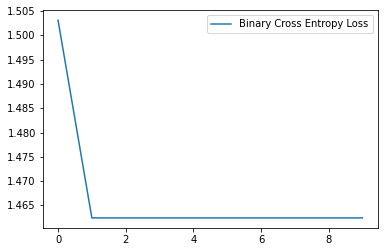

In [9]:
plt.plot(fit.history['loss'], label="Binary Cross Entropy Loss")
plt.legend(loc="upper right")
plt.show()


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


## Training Data

Using our training data to benchmark model performance

In [11]:
predictions = probability_model.predict(X)


14/14 [==============================] - 0s 1ms/step


In [12]:
preds = np.argmax(predictions, axis=1)

Finally create confusion Matrix

In [13]:
tf.math.confusion_matrix(preds, Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[127,   1],
       [274,  41]], dtype=int32)>

## Experiment on the testing set

This section predicts the values on new data using the neural network model. Here we evaluate its performance

In [14]:
X_test = test_data.iloc[:,1:-1]

In [15]:
Y_test = test_data.iloc[:,-1]
Y_test = Y_test - 1
Y_test.value_counts()

0    100
1     10
Name: y_test, dtype: int64

In [16]:
test_predictions = probability_model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [17]:
test_preds = np.argmax(test_predictions, axis=1)

In [18]:
tf.math.confusion_matrix(test_preds, Y_test)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[41,  0],
       [59, 10]], dtype=int32)>

This next chunk of code will help me turn this Colab Notebook into html

In [17]:
%%shell
jupyter nbconvert --to html neural_networks_code.ipynb

[NbConvertApp] Converting notebook neural_networks_code.ipynb to html
[NbConvertApp] Writing 301798 bytes to neural_networks_code.html
